# Wrangling the PISA 2012 Dataset

## About PISA test:-
PISA is the OECD's Programme for International Student Assessment. Every three years it tests 15-year-old students from all over the world in reading, mathematics and science. The tests are designed to gauge how well the students master key subjects in order to be prepared for real-life situations in the adult world. Why choose 15-year-olds? Because in most countries, at the age of 15, students can decide whether or not they want to continue their education. They therefore need to be equipped for adult life. 

### Here, I have chosen to do some preliminary data wrangling to facilitate our Data Exploration phase.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Let us get the encoding of the .csv to be imported 
with open('pisa2012.csv') as f:
    print(f)

<_io.TextIOWrapper name='pisa2012.csv' mode='r' encoding='cp1252'>


In [3]:
pisa2012= pd.read_csv('pisa2012.csv', encoding= 'cp1252')
pisa2012.head(6)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,6,Albania,80000,ALB0006,Non-OECD,Albania,1,6,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


### What is the structure of your dataset?  
The pisa2012 dataframe has 485490 rows spanning across 636 columns. 

In [4]:
pisa2012.shape

(485490, 636)

### What is/are the main feature(s) of interest in your dataset?
Since this is a very huge dataset, let us only keep the columns of interest for our data analysis. Out of the 636 columns, I chose the following 20 columns-

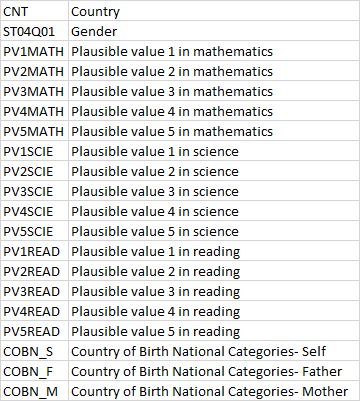

In [5]:
# Let us create a new dataframe called pisa using only the necessary columns from the pisa2012 dataframe. 
cols_to_keep=['CNT','ST04Q01','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE',
              'PV5SCIE','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','COBN_S','COBN_F','COBN_M']

pisa= pisa2012[cols_to_keep]
pisa.head(3)

,CNT,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,COBN_S,COBN_F,COBN_M
0,Albania,Female,406.8469,376.4683,344.5319,321.1637,381.9209,341.7009,408.8400,348.2283,367.8105,392.9877,249.5762,254.3420,406.8496,175.7053,218.5981,Albania,Albania,Albania
1,Albania,Female,486.1427,464.3325,453.4273,472.9008,476.0165,548.9929,471.5964,471.5964,443.6218,454.8116,406.2936,349.8975,400.7334,369.7553,396.7618,Albania,Albania,Albania
2,Albania,Female,533.2684,481.0796,489.6479,490.4269,533.2684,499.6643,428.7952,492.2044,512.7191,499.6643,401.2100,404.3872,387.7067,431.3938,401.2100,Albania,Albania,Albania


In [6]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
CNT        485490 non-null object
ST04Q01    485490 non-null object
PV1MATH    485490 non-null float64
PV2MATH    485490 non-null float64
PV3MATH    485490 non-null float64
PV4MATH    485490 non-null float64
PV5MATH    485490 non-null float64
PV1SCIE    485490 non-null float64
PV2SCIE    485490 non-null float64
PV3SCIE    485490 non-null float64
PV4SCIE    485490 non-null float64
PV5SCIE    485490 non-null float64
PV1READ    485490 non-null float64
PV2READ    485490 non-null float64
PV3READ    485490 non-null float64
PV4READ    485490 non-null float64
PV5READ    485490 non-null float64
COBN_S     481836 non-null object
COBN_F     481825 non-null object
COBN_M     481843 non-null object
dtypes: float64(15), object(5)
memory usage: 74.1+ MB


All the columns have no null values except for those denoting the Student, Father and Mother Birth Country columns.

In [7]:
# Let us check for duplicates in our pisa dataframe
sum(pisa.duplicated())

0

We do not have any duplicates in our data. :)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?  

I would like make use of the Test Scores columns in the Math, Science and Reading subjects as the Quantitative(Numerical) variables and the columns of Country, Gender and Parent Country Origin as the Qualitative(Categorical) variables for my Exploratory Data Analysis.  
I would like to investigate the relationships that exits between different pairs of these variables and what are the conclusions that we can arrive at.

### Data Wrangling Steps:

1) The scores in the subjects Math, Science and Reading are spread across 15 columns respectively and need to consolidated into 3 columns namely Avg Math Score, Avg Science Score and Avg Reading Score. 

In [8]:
# Let us compute the respective averages of the 5 Plausible Math, Science and Reading Scores 

pisa.loc[:,'Avg Math Score']= (pisa['PV1MATH'] + pisa['PV2MATH'] + pisa['PV3MATH'] + pisa['PV4MATH'] + pisa['PV5MATH']) /5
pisa.loc[:,'Avg Science Score']= (pisa['PV1SCIE'] + pisa['PV2SCIE'] + pisa['PV3SCIE'] + pisa['PV4SCIE'] + pisa['PV5SCIE']) /5
pisa.loc[:,'Avg Reading Score']= (pisa['PV1READ'] + pisa['PV2READ'] + pisa['PV3READ'] + pisa['PV4READ'] + pisa['PV5READ']) /5

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2) Let us check the Country column for any unintended errors. 

In [9]:
pisa.CNT.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

The states of Florida, Massachussets and Connecticut have been considered as seperate countries.

In [10]:
# These rows have considered the states of Florida, Massachussets and Connecticut as seperate countries. 
# So let us replace them with United States of America.

state_names=['Florida (USA)','Massachusetts (USA)','Connecticut (USA)']
pisa['CNT'].replace(state_names, 'United States of America', inplace= True)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
# This has helped us see the actual position of United States of America as well as 65 economies that participated in 
# PISA 2012.
pisa.CNT.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
United States of America    10294
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay       

3) Let us now rename all our columns and drop the unnecessary columns.

In [12]:
# Columns to rename in pisa
pisa.rename({'CNT' : 'Country','ST04Q01' : 'Gender','COBN_S':'Birth Country Student','COBN_F':'Birth Country Father',
             'COBN_M':'Birth Country Mother'}, axis = 1, inplace = True)

# Columns to drop from pisa
cols_to_drop=['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
              'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']
pisa.drop(cols_to_drop, axis=1, inplace= True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


4) Let us employ some Feature Engineering by adding a new column called 'Parent Country Origin' that constitutes the values in both the 'Birth Country Father' and 'Birth Country Mother' columns. This will enable us with more understanding about how the students fared in the test, given their parent's origin was either from same or different countries. 

In [14]:
# As seen in pisa.info(), we need to handle the null values in the 'Birth Country Student','Birth Country Father' 
# and 'Birth Country Mother' columns before creating the new column
pisa.loc[:,'Birth Country Student'].fillna('Unknown', inplace=True)
pisa.loc[:,'Birth Country Father'].fillna('Unknown FC', inplace=True)
pisa.loc[:,'Birth Country Mother'].fillna('Unknown MC', inplace=True)

In [15]:
# The'Parent Country Origin' column returns True only if there are matching values between the 'Birth Country Father' and 
# 'Birth Country Mother' columns.
pisa.loc[:,'Parent Country Origin']= pisa['Birth Country Father']==pisa['Birth Country Mother']

In [16]:
# Let us check how our pisa dataframe looks now
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
Country                  485490 non-null object
Gender                   485490 non-null object
Birth Country Student    485490 non-null object
Birth Country Father     485490 non-null object
Birth Country Mother     485490 non-null object
Avg Math Score           485490 non-null float64
Avg Science Score        485490 non-null float64
Avg Reading Score        485490 non-null float64
Parent Country Origin    485490 non-null bool
dtypes: bool(1), float64(3), object(5)
memory usage: 30.1+ MB


In [17]:
pisa['Parent Country Origin'].value_counts()

True     428025
False     57465
Name: Parent Country Origin, dtype: int64

In [18]:
pisa['Parent Country Origin'].dtype

dtype('bool')

In [21]:
# We see that the 'Parent Country Origin' column is of type bool. Let us convert into an object datatype and 
# replace the True values with 'Same' and False values with 'Different'.

pisa.loc[:,'Parent Country Origin']= pisa['Parent Country Origin'].astype('str')
pisa.loc[:,'Parent Country Origin'].replace({'True':'Same', 'False':'Different'}, inplace= True)

In [22]:
pisa['Parent Country Origin'].value_counts()

Same         428025
Different     57465
Name: Parent Country Origin, dtype: int64

Let us save our pisa dataframe into a new .csv file for further explorations.

In [23]:
# Saving the pisa dataframe into a new .csv file for further explorations.
pisa.to_csv('pisa_clean.csv',index=False)